In [63]:
# perform necessary import
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import numpy.random as nr
import math
import statsmodels.api as sm

from sklearn import preprocessing
import sklearn.model_selection as ms
from sklearn import linear_model
import sklearn.metrics as sklm

from sklearn import svm, preprocessing

%matplotlib inline

In [64]:
from IPython.display import HTML
HTML('''<script>
var code_show_err = false; 
var code_toggle_err = function() {
 var stderrNodes = document.querySelectorAll('[data-mime-type="application/vnd.jupyter.stderr"]')
 var stderr = Array.from(stderrNodes)
 if (code_show_err){
     stderr.forEach(ele => ele.style.display = 'block');
 } else {
     stderr.forEach(ele => ele.style.display = 'none');
 }
 code_show_err = !code_show_err
} 
document.addEventListener('DOMContentLoaded', code_toggle_err);
</script>
To toggle on/off output_stderr, click <a onclick="javascript:code_toggle_err()">here</a>.''')

In [65]:
customer_info = pd.read_csv('TrainingData.csv')

In [66]:
print(customer_info.shape)

(5822, 86)


In [67]:
(customer_info.astype(np.object).isnull()).any()

MOSTYPE     False
MAANTHUI    False
MGEMOMV     False
MGEMLEEF    False
MOSHOOFD    False
            ...  
APLEZIER    False
AFIETS      False
AINBOED     False
ABYSTAND    False
CARAVAN     False
Length: 86, dtype: bool

In [68]:
#customer_info.describe()

In [69]:
#customer_info.CARAVAN.value_counts(normalize=True)

In [70]:
#ALEVEN Number of life insurances
#AWAOREG Number of disability insurance policies
#APERSONG Number of private accident insurance policies
#Correlation Correlation Meaning
#0 - 0.1 Negligible
#0.1 - 0.3 Small
#0.3 - 0.5 Medium
#0.50 + Large
corr_mat = customer_info[['ALEVEN', 'AWAOREG', 'APERSONG', 'CARAVAN' ]].corr() #Small Num of Life Insurance and Private accident insurance policies 
print(corr_mat)
corr_mat.iloc[0,3].round(3)

            ALEVEN   AWAOREG  APERSONG   CARAVAN
ALEVEN    1.000000 -0.006280  0.016411  0.037118
AWAOREG  -0.006280  1.000000 -0.004384  0.022337
APERSONG  0.016411 -0.004384  1.000000 -0.008492
CARAVAN   0.037118  0.022337 -0.008492  1.000000


0.037

In [71]:
predictors = sm.add_constant(customer_info.ALEVEN, prepend = False)

lm_mod = sm.OLS(customer_info.CARAVAN, predictors)
res = lm_mod.fit()
print(res.summary())

                            OLS Regression Results                            
Dep. Variable:                CARAVAN   R-squared:                       0.001
Model:                            OLS   Adj. R-squared:                  0.001
Method:                 Least Squares   F-statistic:                     8.029
Date:                Wed, 16 Dec 2020   Prob (F-statistic):            0.00462
Time:                        20:57:43   Log-Likelihood:                 123.23
No. Observations:                5822   AIC:                            -242.5
Df Residuals:                    5820   BIC:                            -229.1
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
ALEVEN         0.0233      0.008      2.834      0.0

In [72]:
# bar plot function for non numeric features
# plot bar plot for CARAVAN insurance buyer counts

def plt_bar_plot(cat_cols):
    customer_info['dummy'] = np.ones(shape = customer_info.shape[0])
    for col in cat_cols:
        print(col)
        counts = customer_info[['dummy', 'CARAVAN', col]].groupby(['CARAVAN', col], as_index = False).count()
        temp = counts[counts['CARAVAN'] == 0][[col, 'dummy']]
        temp.plot.bar(x=col,y ='dummy')

        plt.title('Counts for ' + col + '\n non CARAVAN insurance buyer')
        plt.ylabel('count')
        temp = counts[counts['CARAVAN'] == 1][[col, 'dummy']]
        temp.plot.bar(x=col,y ='dummy')

        plt.title('Counts for ' + col + '\n CARAVAN insurance buyer')
        plt.ylabel('count')
        plt.show()

In [73]:
print(customer_info)

      MOSTYPE  MAANTHUI  MGEMOMV  MGEMLEEF  MOSHOOFD  MGODRK  MGODPR  MGODOV  \
0          33         1        3         2         8       0       5       1   
1          37         1        2         2         8       1       4       1   
2          37         1        2         2         8       0       4       2   
3           9         1        3         3         3       2       3       2   
4          40         1        4         2        10       1       4       1   
...       ...       ...      ...       ...       ...     ...     ...     ...   
5817       36         1        1         2         8       0       6       1   
5818       35         1        4         4         8       1       4       1   
5819       33         1        3         4         8       0       6       0   
5820       34         1        3         2         8       0       7       0   
5821       33         1        3         3         8       0       6       1   

      MGODGE  MRELGE  ...  APERSONG  AG

In [74]:
columns = list(customer_info.columns)
column_names = columns[0:85]

MOSTYPE


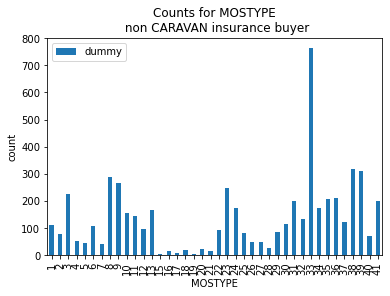

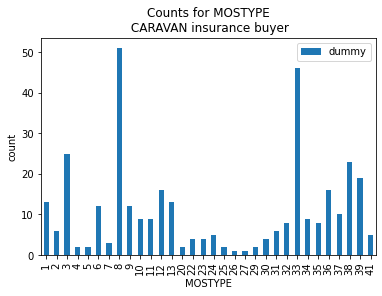

MAANTHUI


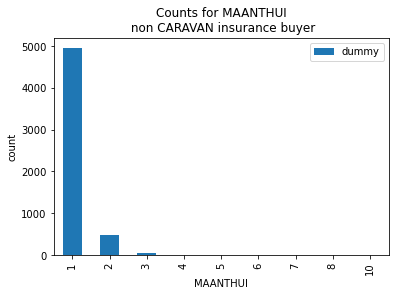

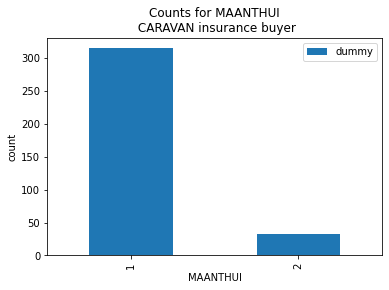

MGEMOMV


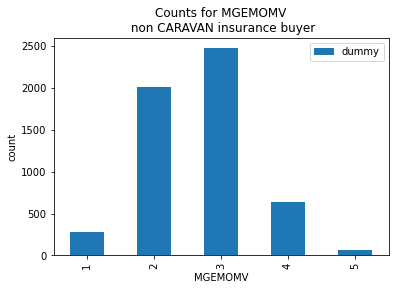

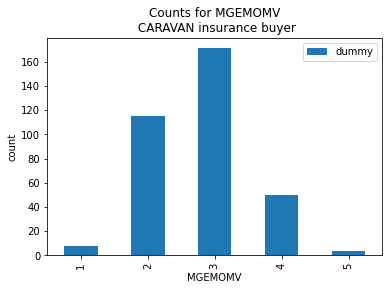

MGEMLEEF


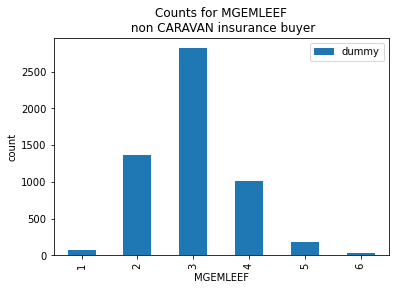

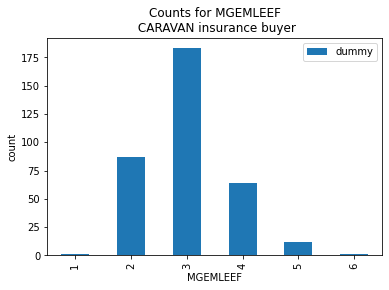

MOSHOOFD


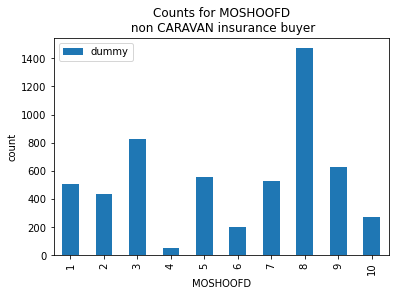

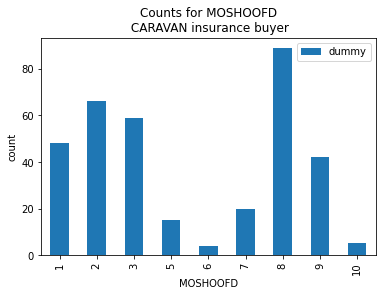

MGODRK


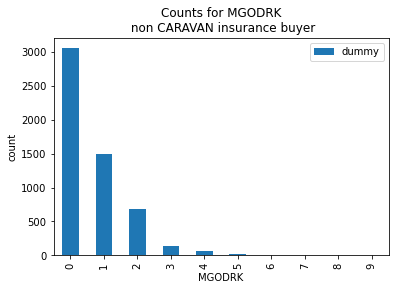

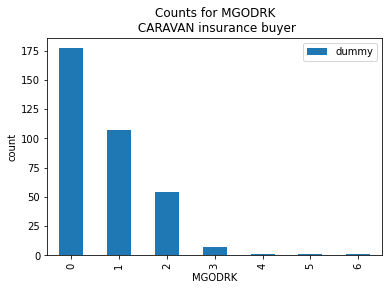

MGODPR


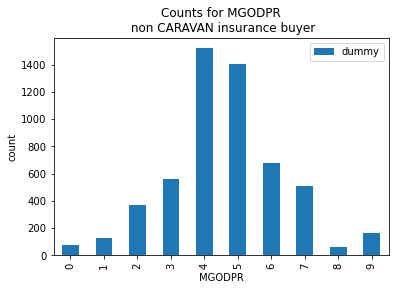

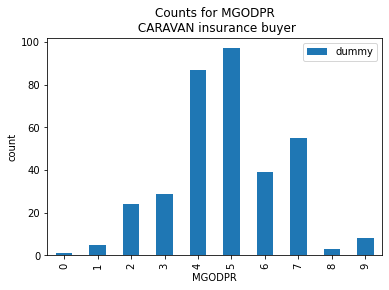

MGODOV


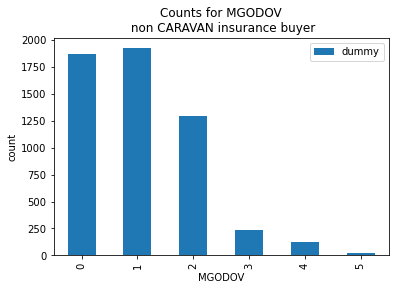

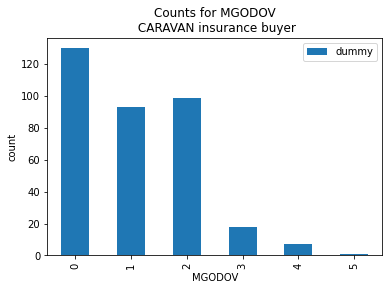

MGODGE


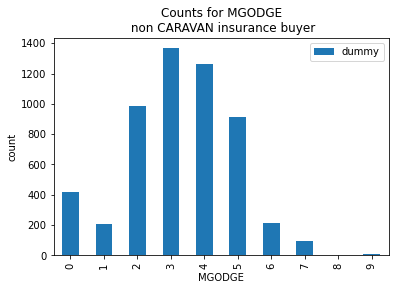

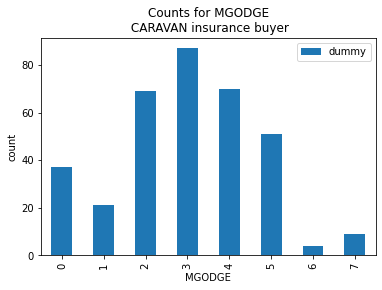

MRELGE


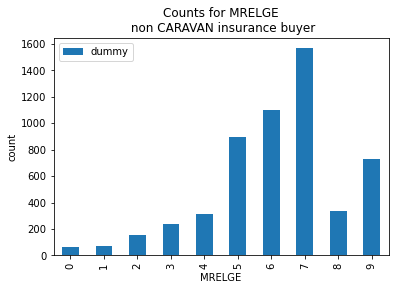

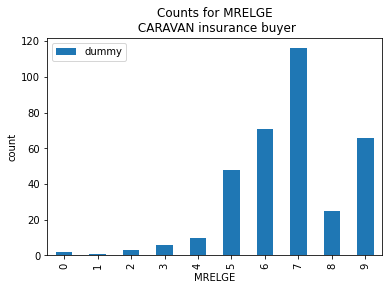

MRELSA 


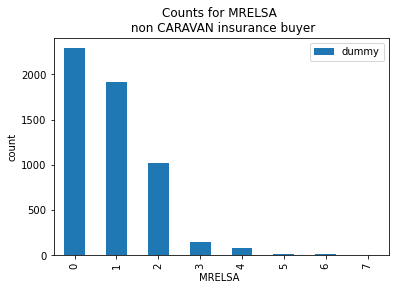

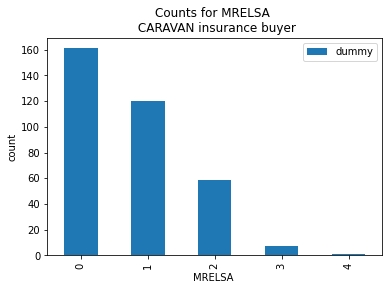

MRELOV


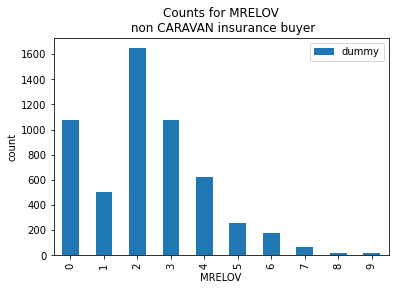

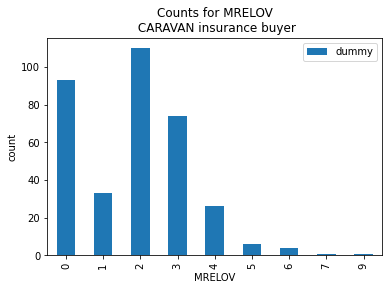

MFALLEEN


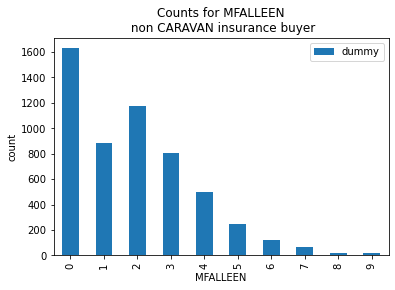

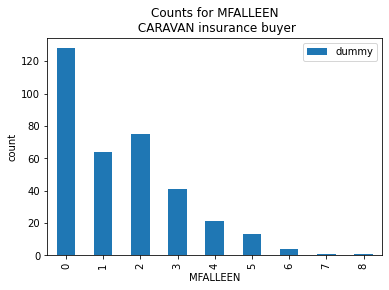

MFGEKIND


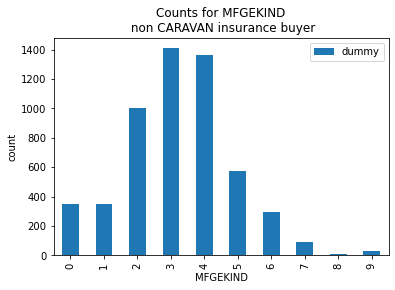

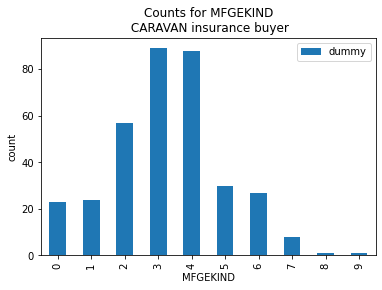

MFWEKIND


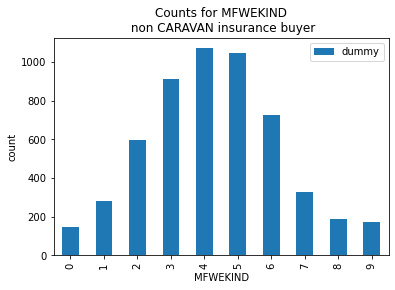

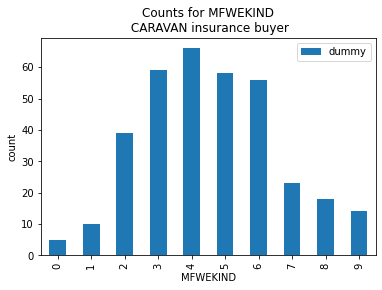

MOPLHOOG


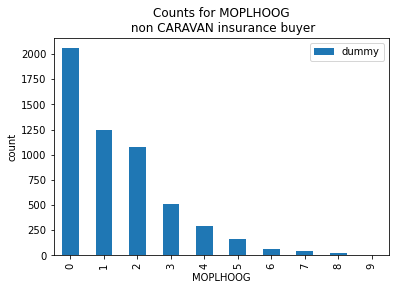

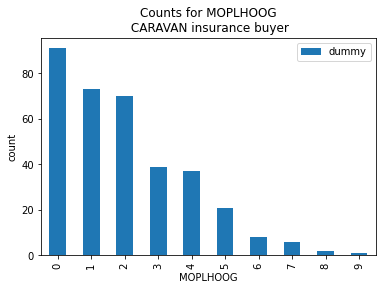

MOPLMIDD


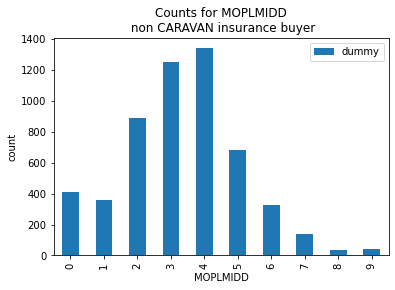

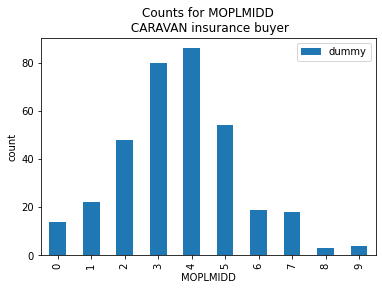

MOPLLAAG


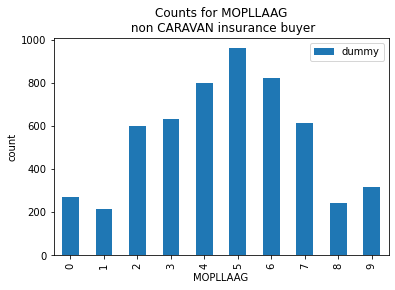

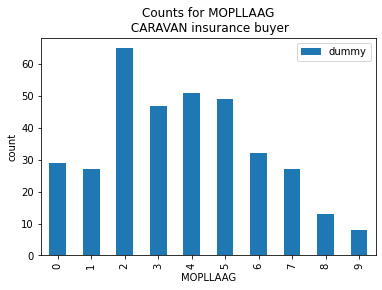

MBERHOOG


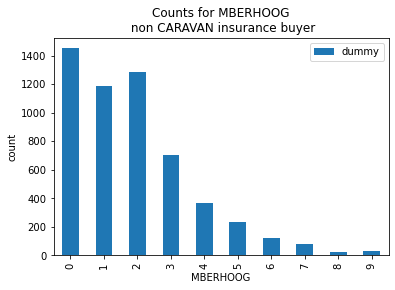

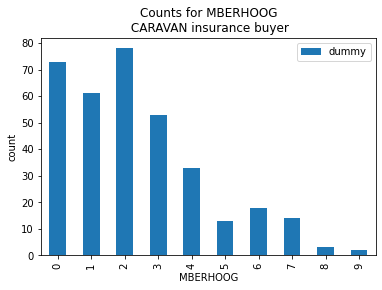

MBERZELF


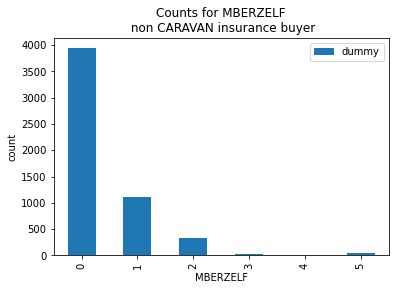

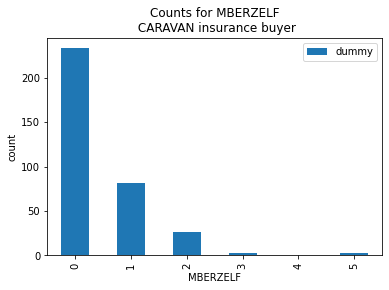

MBERBOER


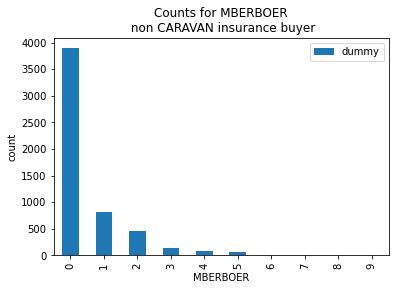

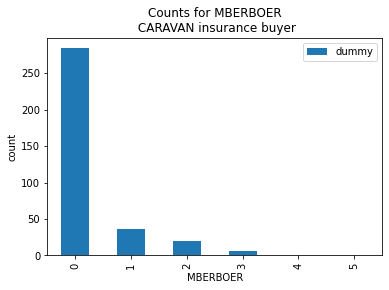

MBERMIDD


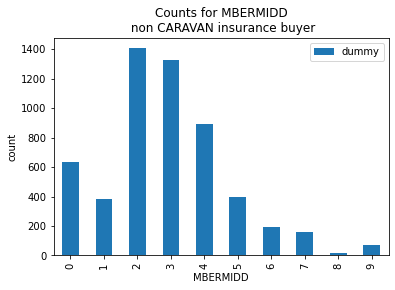

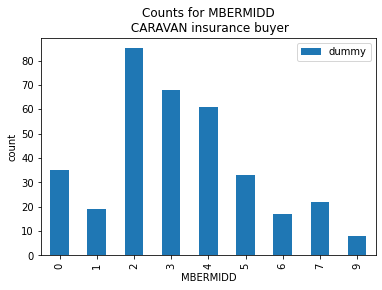

MBERARBG


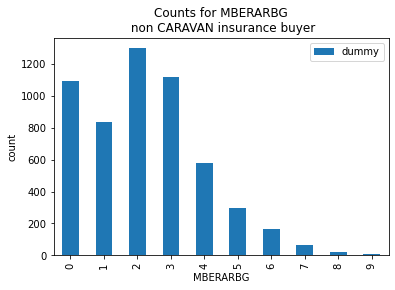

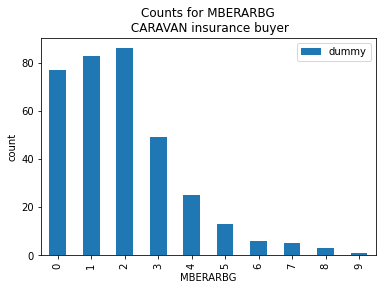

MBERARBO


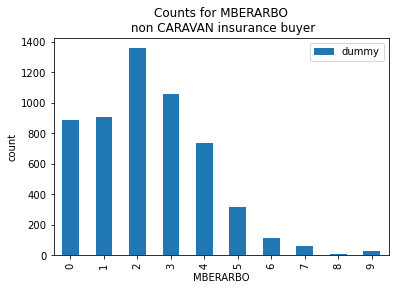

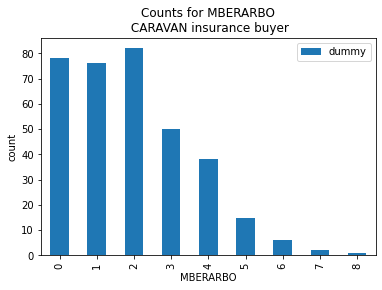

MSKA


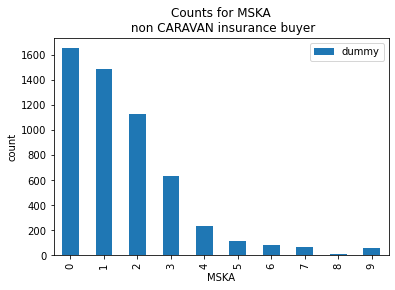

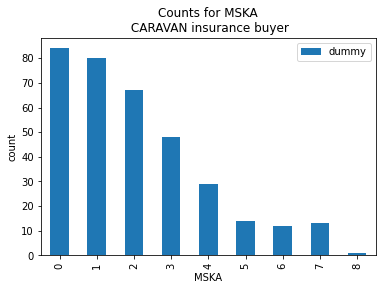

MSKB1


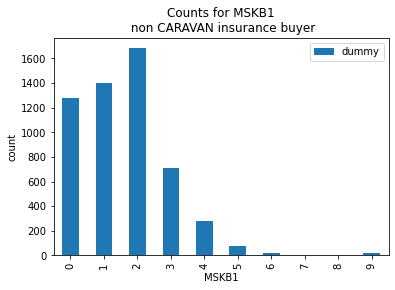

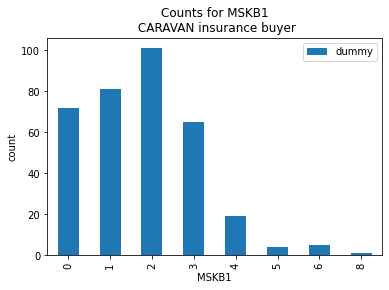

MSKB2


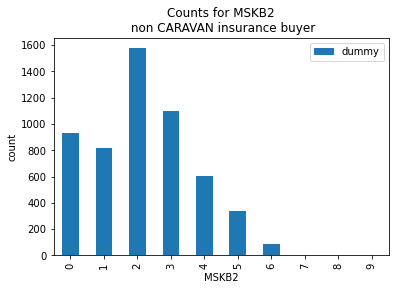

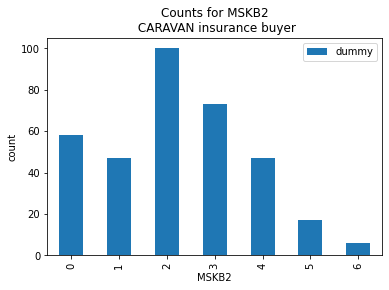

MSKC


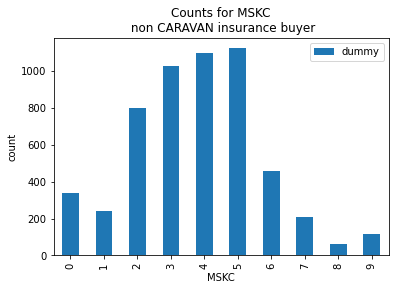

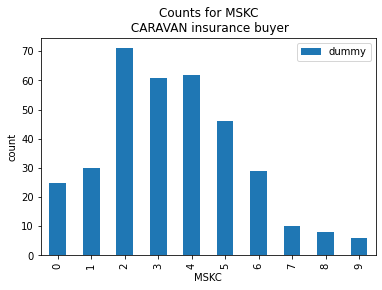

MSKD


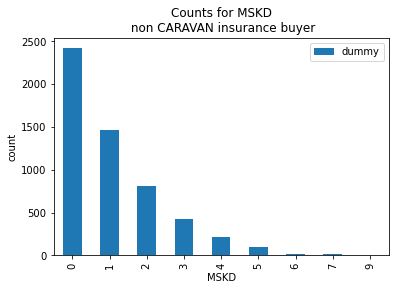

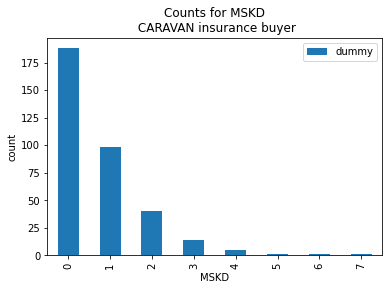

MHHUUR


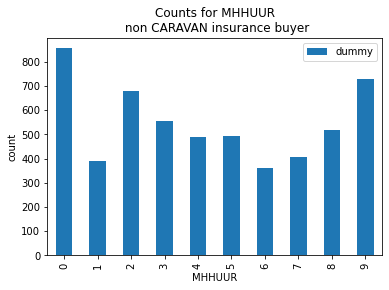

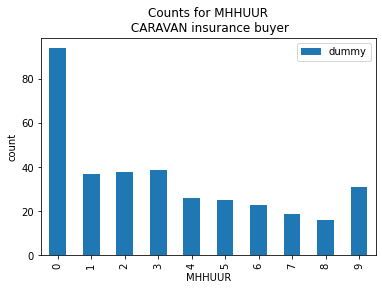

MHKOOP


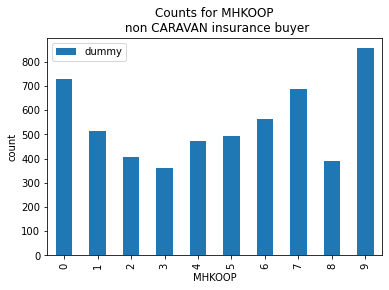

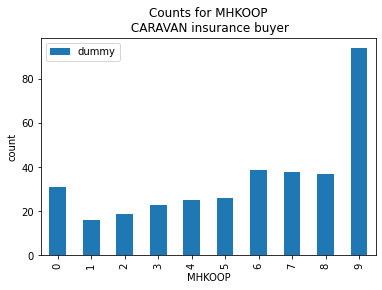

MAUT1


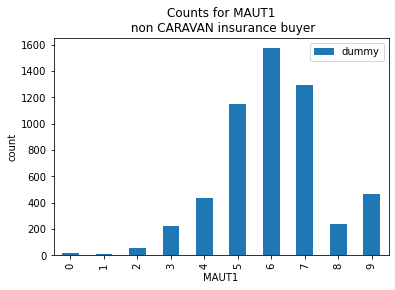

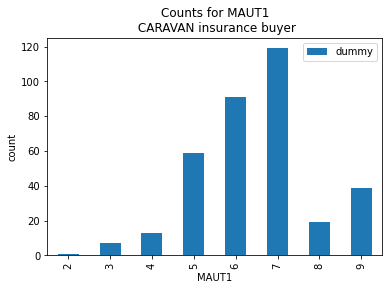

MAUT2


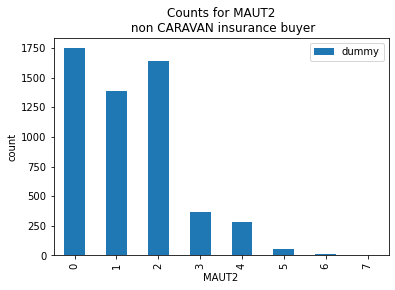

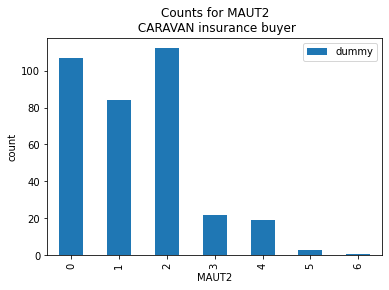

MAUT0


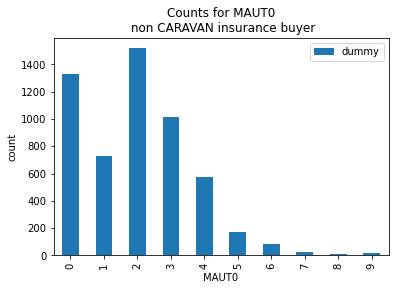

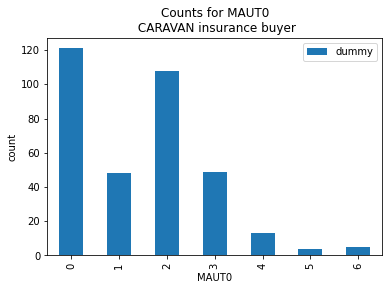

MZFONDS


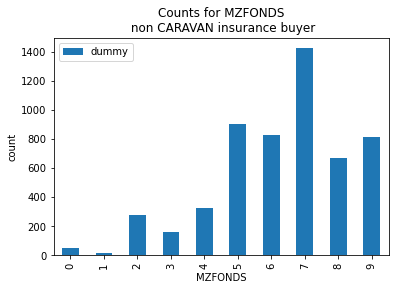

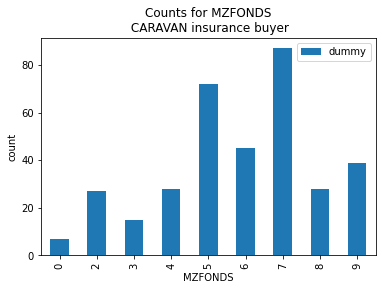

MZPART


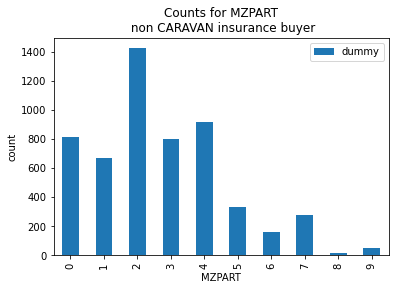

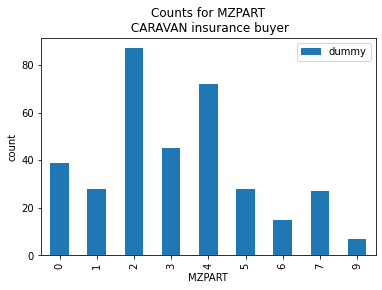

MINKM30


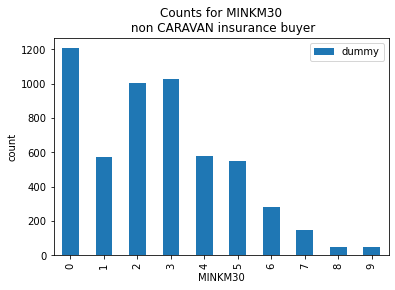

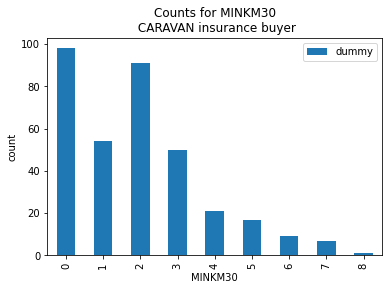

MINK3045


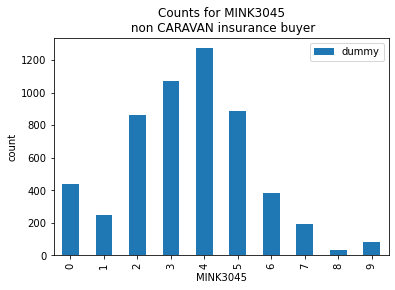

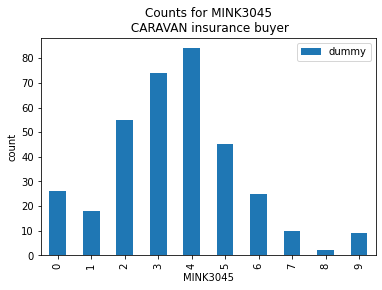

MINK4575


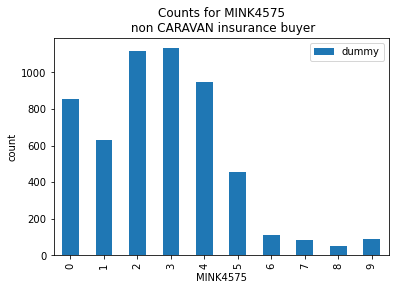

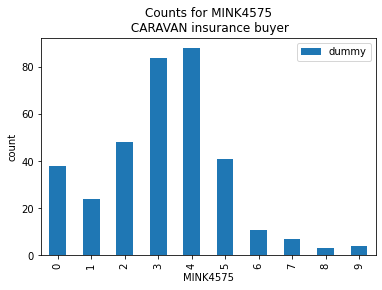

MINK7512


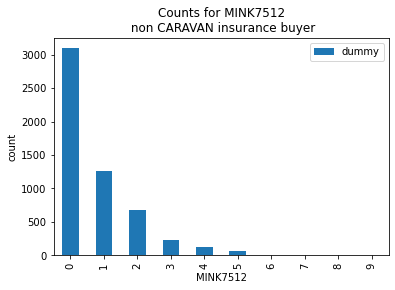

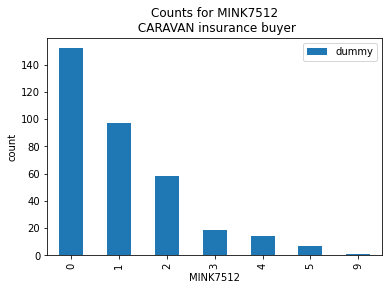

MINK123M


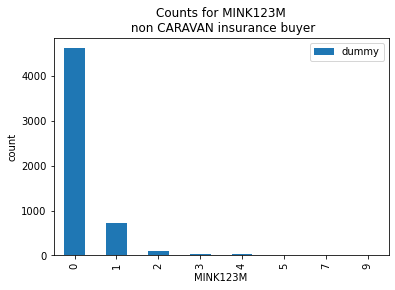

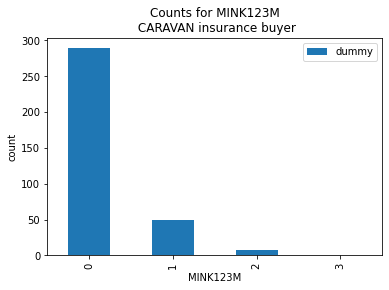

MINKGEM


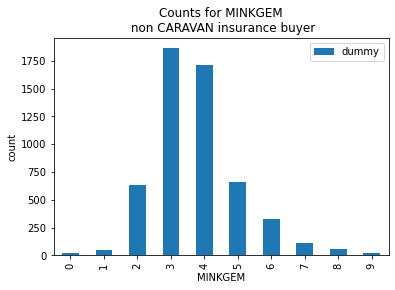

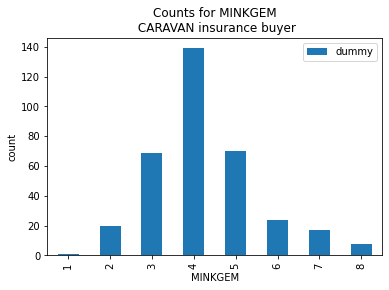

MKOOPKLA


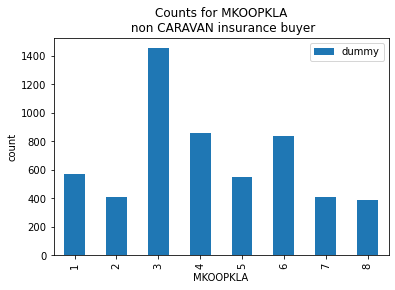

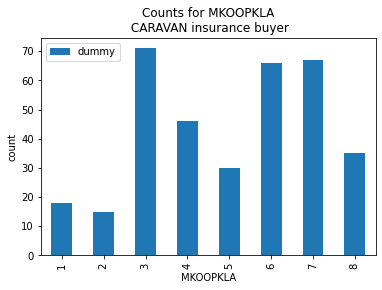

PWAPART


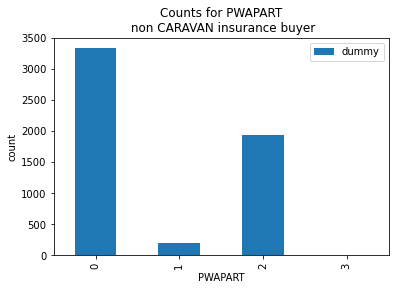

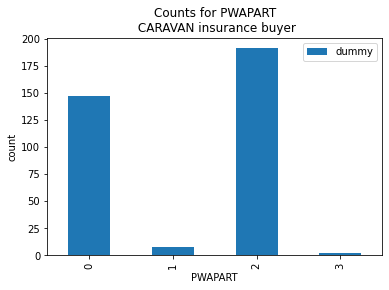

PWABEDR


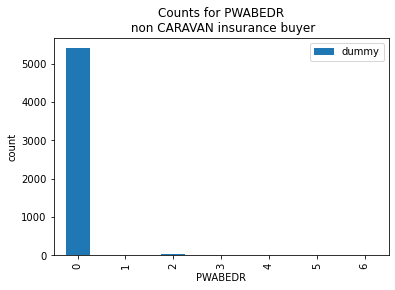

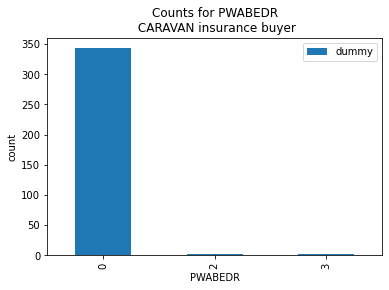

PWALAND


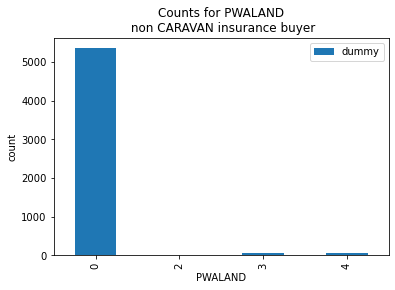

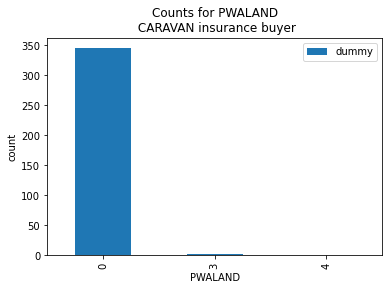

PPERSAUT


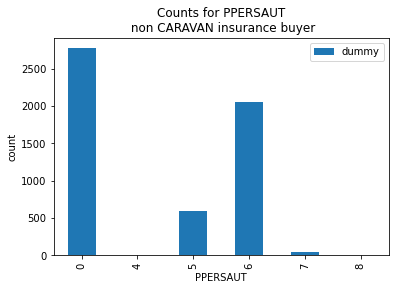

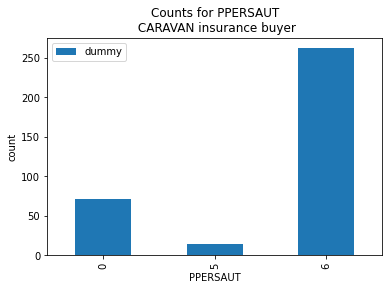

PBESAUT


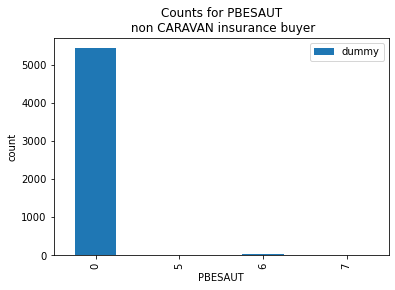

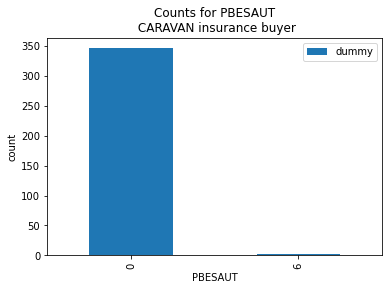

PMOTSCO 


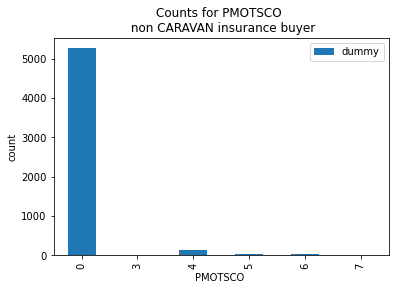

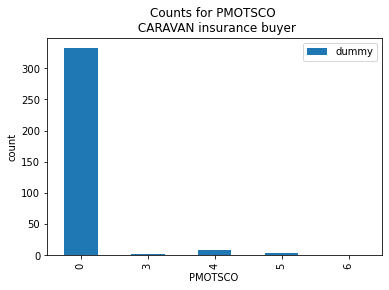

PVRAAUT


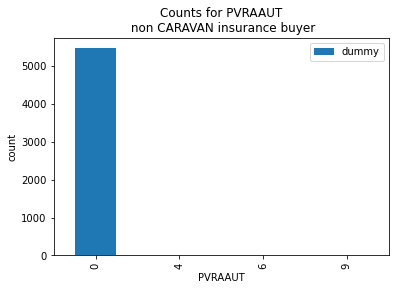

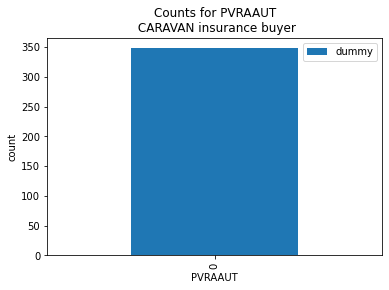

PAANHANG


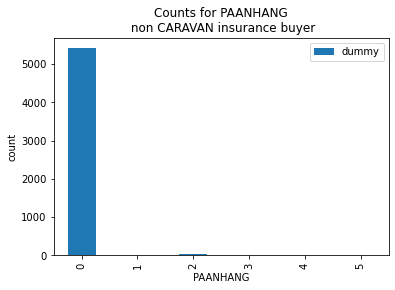

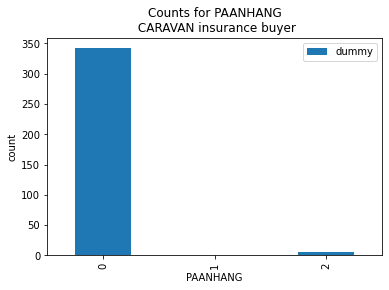

PTRACTOR


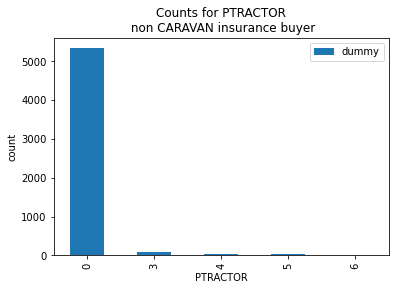

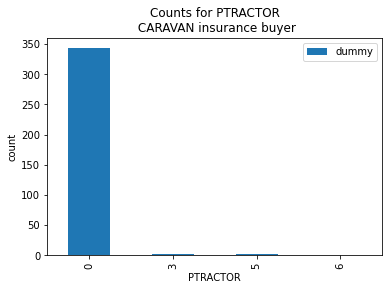

PWERKT


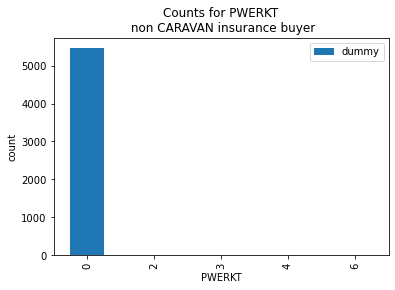

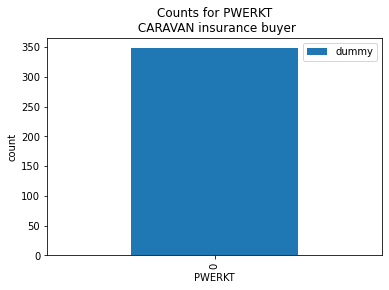

PBROM


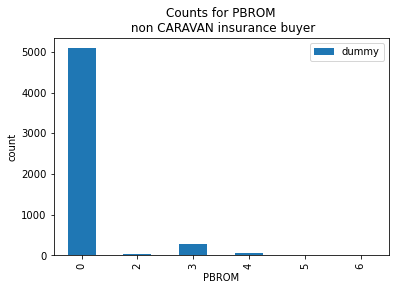

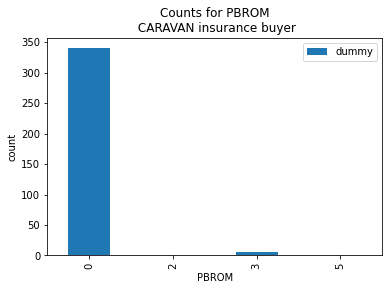

PLEVEN


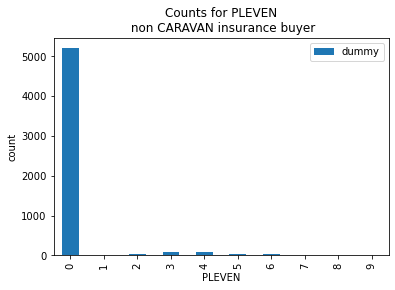

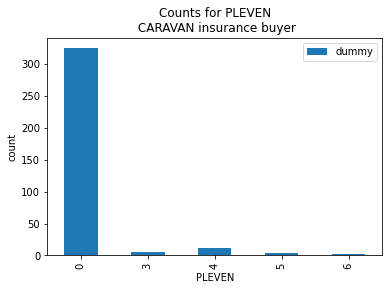

PPERSONG


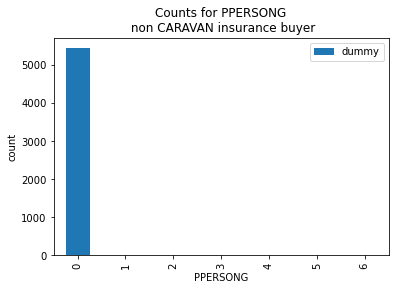

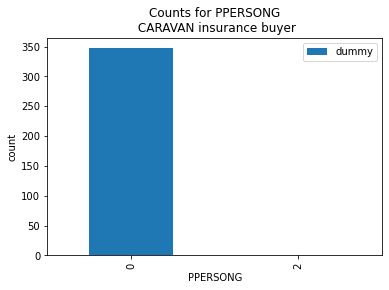

PGEZONG


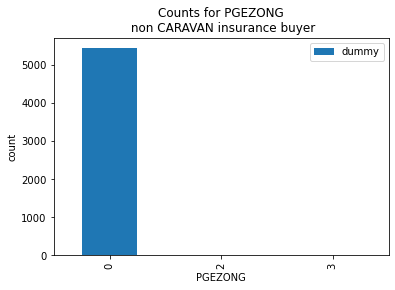

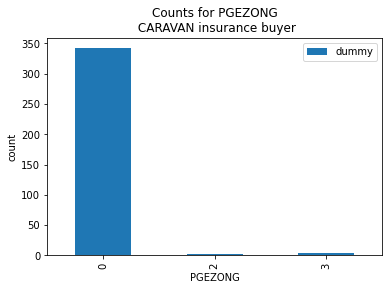

PWAOREG


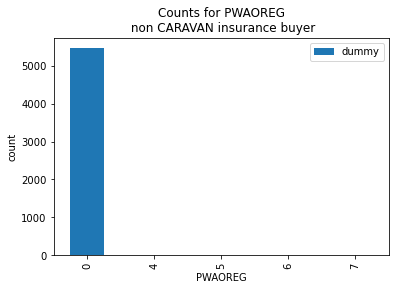

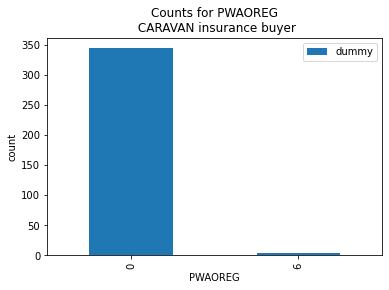

PBRAND


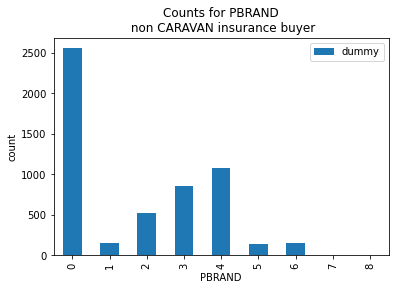

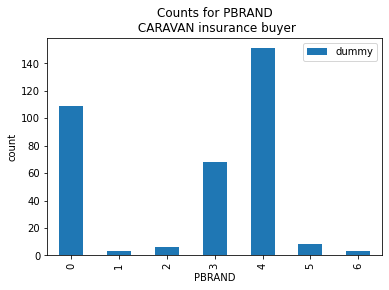

PZEILPL


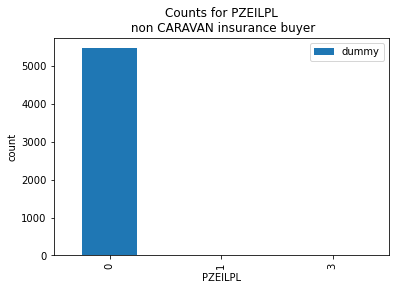

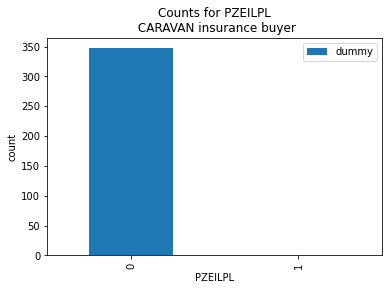

PPLEZIER


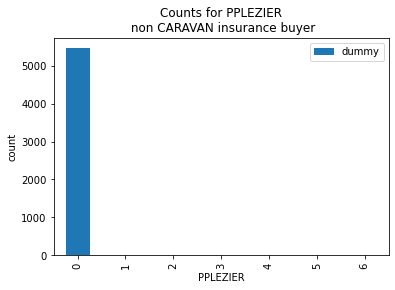

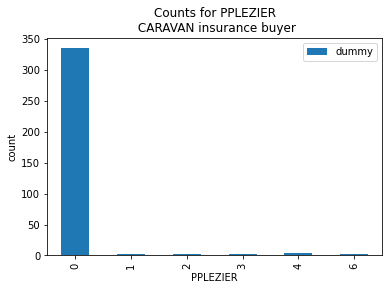

PFIETS


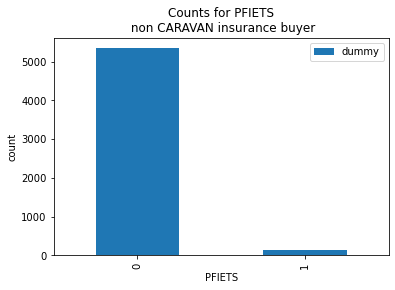

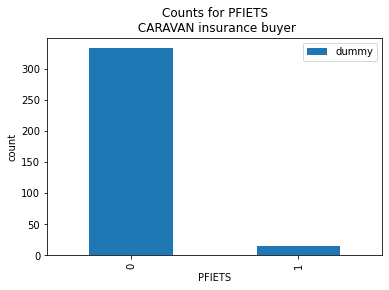

PINBOED


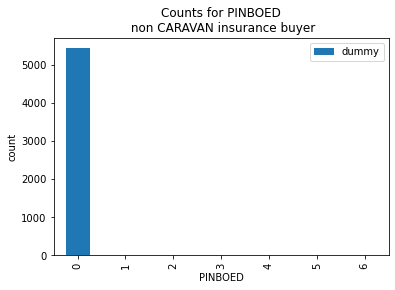

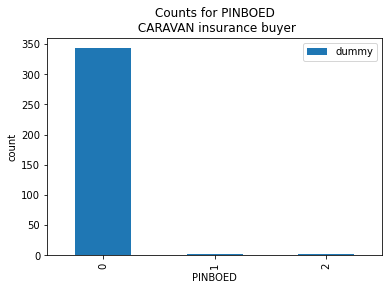

PBYSTAND


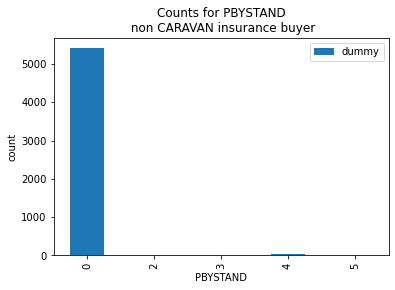

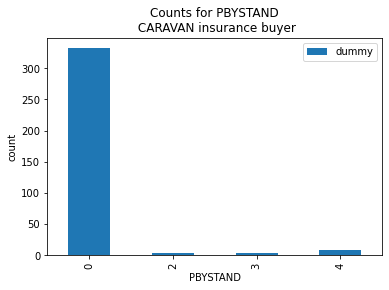

AWAPART


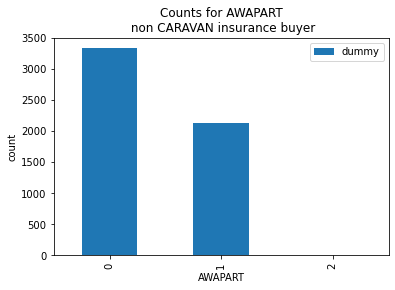

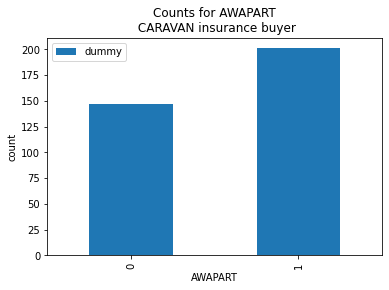

AWABEDR


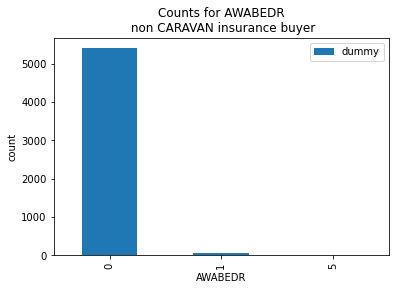

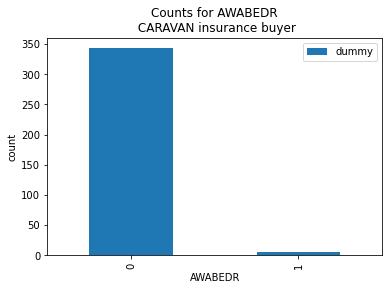

AWALAND


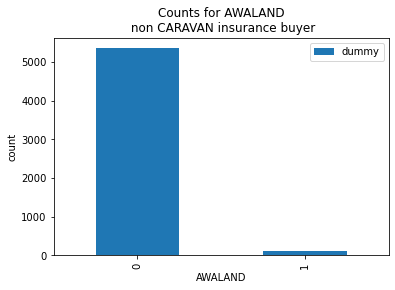

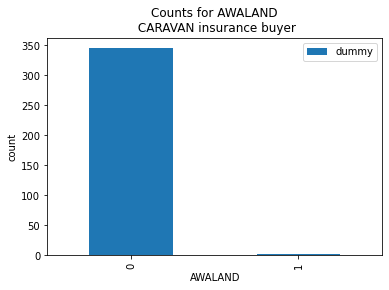

APERSAUT


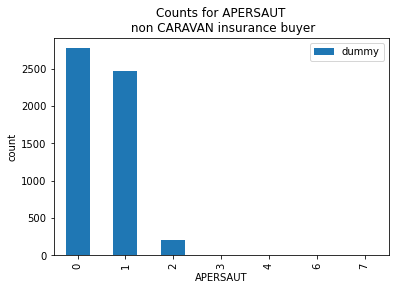

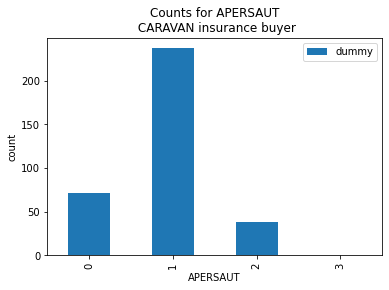

ABESAUT


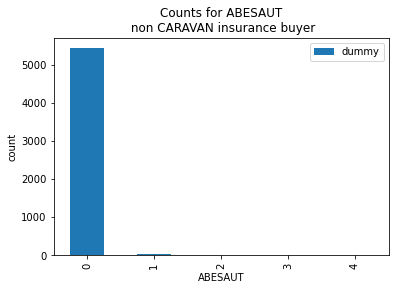

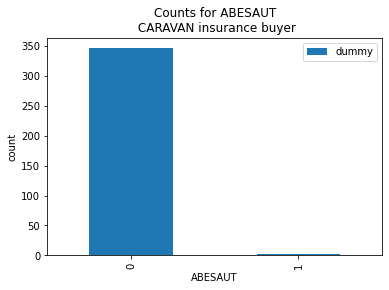

AMOTSCO


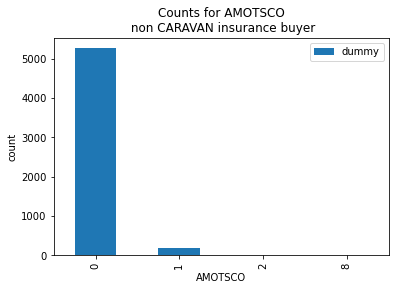

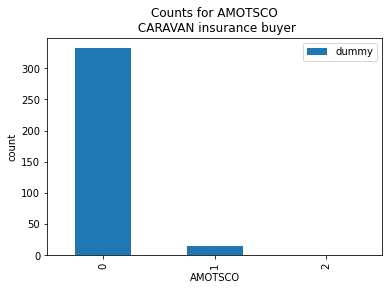

AVRAAUT


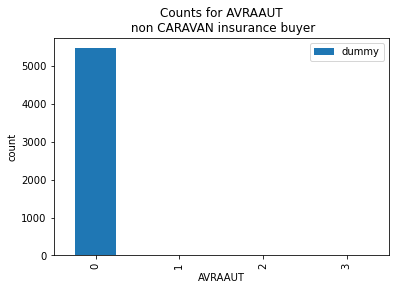

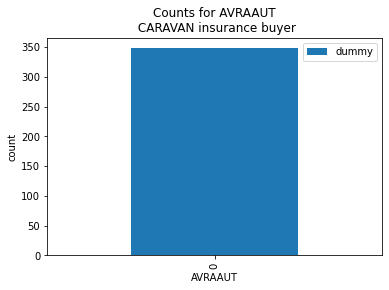

AAANHANG


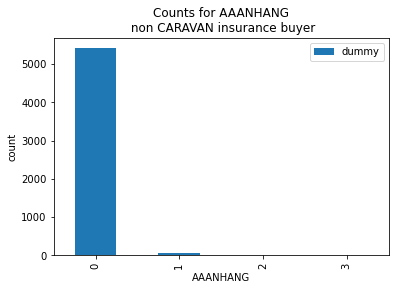

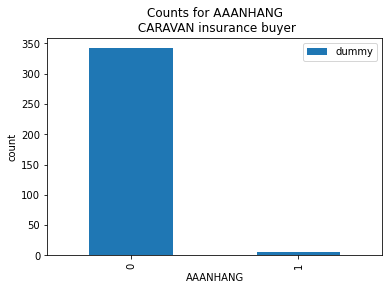

ATRACTOR


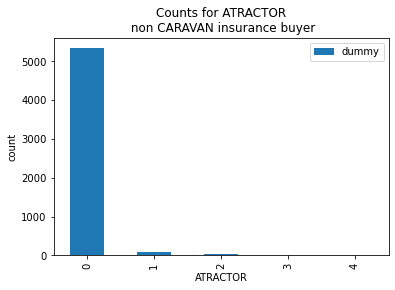

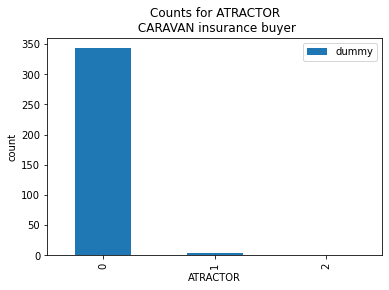

AWERKT


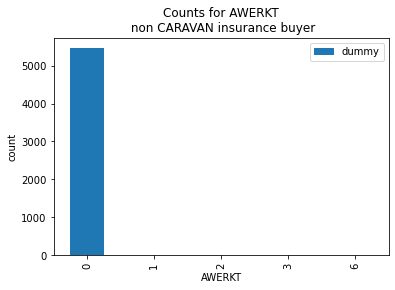

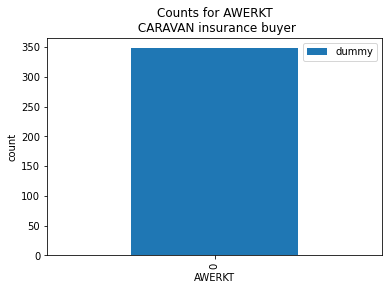

ABROM


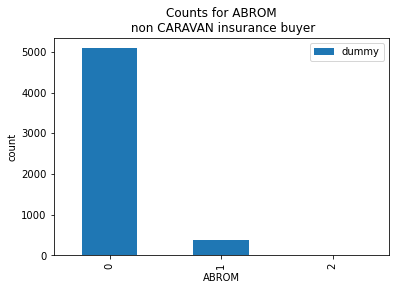

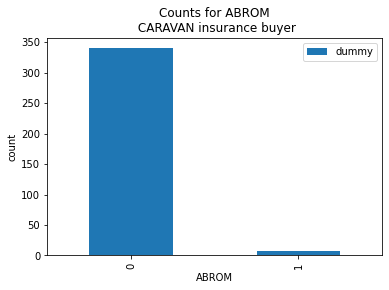

ALEVEN


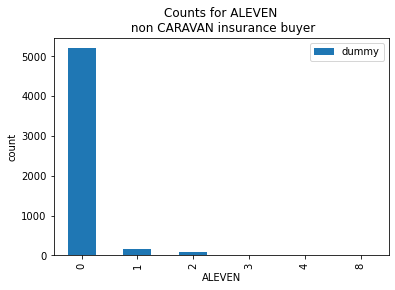

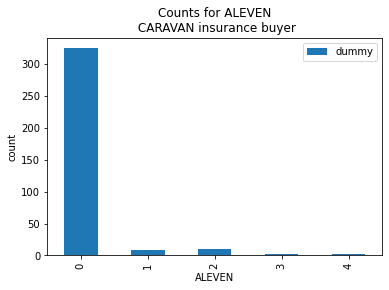

APERSONG


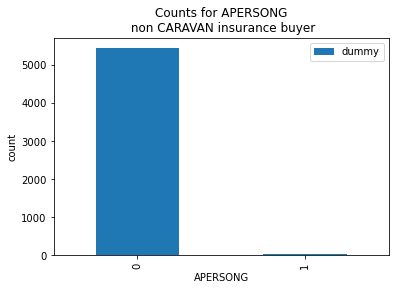

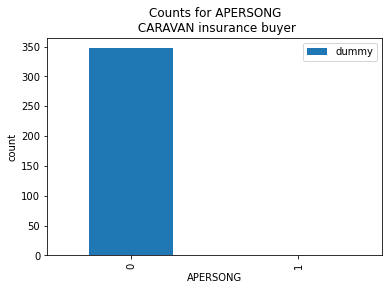

AGEZONG


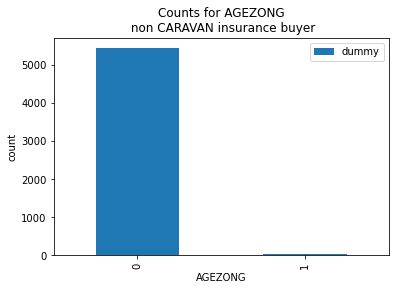

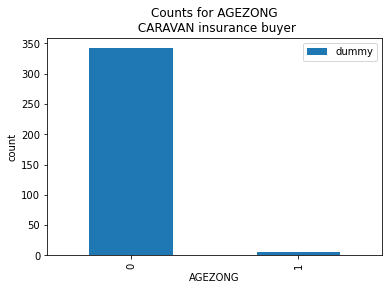

AWAOREG


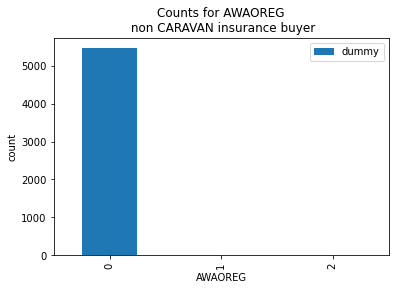

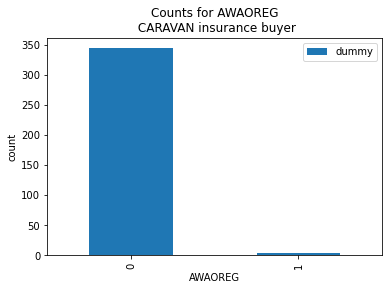

ABRAND


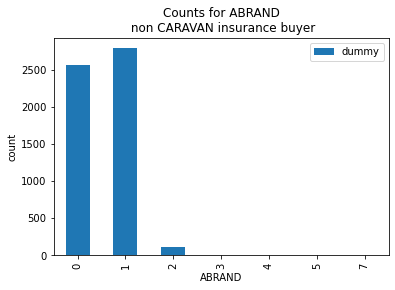

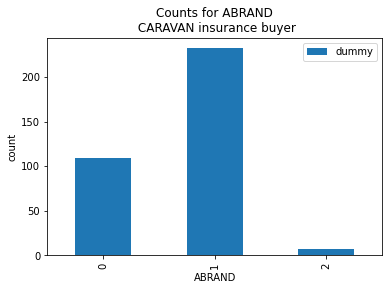

AZEILPL


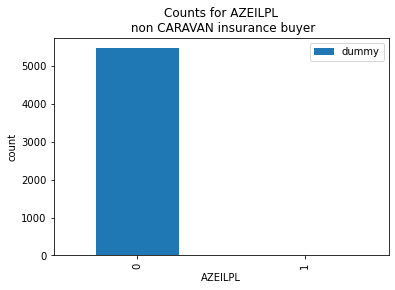

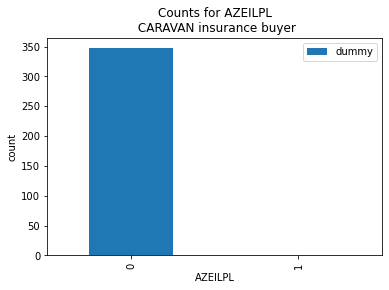

APLEZIER


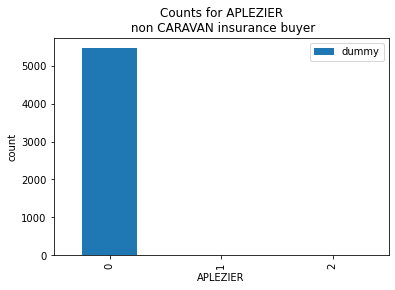

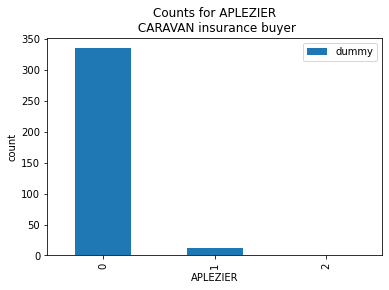

AFIETS


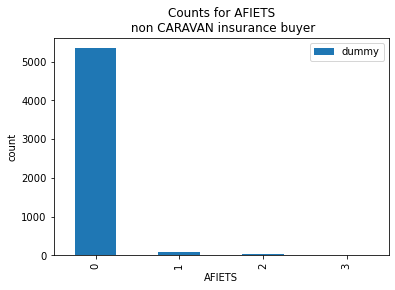

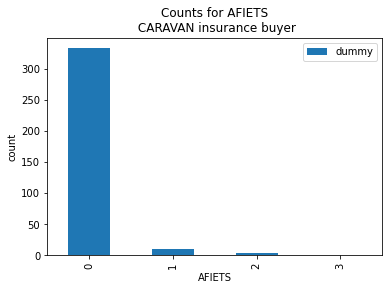

AINBOED


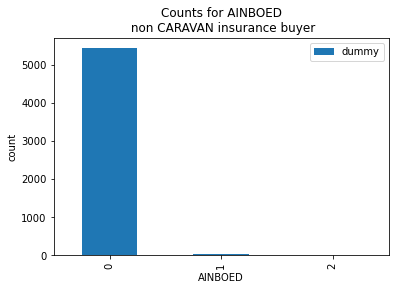

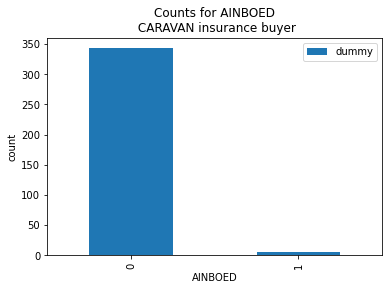

ABYSTAND


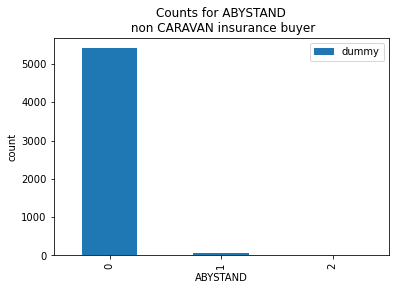

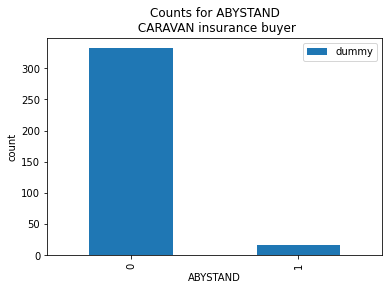

In [75]:
#https://www.geeksforgeeks.org/how-to-get-column-names-in-pandas-dataframe/
plt_bar_plot(column_names)
#'MOSTYPE', 'MHKOOP', 'MAUT1'

In [76]:
chosen = []
for col in column_names:
    stdev0 = customer_info[customer_info['CARAVAN'] == 0][[col]].std()
    mean0 = customer_info[customer_info['CARAVAN'] == 0][[col]].mean()
    #print(stdev0)
    
    stdev1 = customer_info[customer_info['CARAVAN'] == 1][[col]].std()
    mean1 = customer_info[customer_info['CARAVAN'] == 1][[col]].mean()
    #print(stdev1)
    
    relsm0 = abs(stdev0/mean0)
    #print(relsm0)
    relsm1 = abs(stdev1/mean1)
    #print(relsm1)
    
    reldif = (abs(relsm0 - relsm1)/relsm0)*100
    if (stdev0[0] >= 0.12) and (stdev1[0] >= 0.12)and (reldif[0] >=17):
        chosen.append([col, reldif[0]])        
        print(reldif)



MOSTYPE    28.948422
dtype: float64
MAANTHUI    27.686511
dtype: float64
MOSHOOFD    26.58537
dtype: float64
MRELGE    22.436943
dtype: float64
MOPLLAAG    23.492605
dtype: float64
MBERBOER    21.875138
dtype: float64
MSKD    17.212279
dtype: float64
MHHUUR    28.748684
dtype: float64
MHKOOP    19.607322
dtype: float64
MAUT1    17.900933
dtype: float64
MINK4575    19.386551
dtype: float64
MINK7512    17.261742
dtype: float64
PWAPART    31.723301
dtype: float64
PWALAND    58.290958
dtype: float64
PPERSAUT    49.654666
dtype: float64
PBESAUT    20.784758
dtype: float64
PAANHANG    25.688154
dtype: float64
PTRACTOR    33.916859
dtype: float64
PBROM    82.10578
dtype: float64
PLEVEN    17.488978
dtype: float64
PGEZONG    42.231268
dtype: float64
PWAOREG    45.477862
dtype: float64
PBRAND    32.139416
dtype: float64
PPLEZIER    67.281678
dtype: float64
PFIETS    25.835389
dtype: float64
PINBOED    34.552351
dtype: float64
PBYSTAND    49.239956
dtype: float64
AWAPART    31.575099
dtype: floa

In [77]:
#https://www.geeksforgeeks.org/multi-dimensional-lists-in-python/
print(chosen)



[['MOSTYPE', 28.948422002050737], ['MAANTHUI', 27.686510629518857], ['MOSHOOFD', 26.585370147065113], ['MRELGE', 22.43694298695037], ['MOPLLAAG', 23.492605009062263], ['MBERBOER', 21.87513846061358], ['MSKD', 17.212278584107782], ['MHHUUR', 28.74868428119311], ['MHKOOP', 19.607322254967823], ['MAUT1', 17.900932599669613], ['MINK4575', 19.386551375642213], ['MINK7512', 17.261742059170928], ['PWAPART', 31.723300615837303], ['PWALAND', 58.290958477539625], ['PPERSAUT', 49.65466589897418], ['PBESAUT', 20.78475833833303], ['PAANHANG', 25.68815436866212], ['PTRACTOR', 33.91685852330465], ['PBROM', 82.1057799771514], ['PLEVEN', 17.488977760163273], ['PGEZONG', 42.23126821471961], ['PWAOREG', 45.47786194266251], ['PBRAND', 32.13941602206546], ['PPLEZIER', 67.28167786084909], ['PFIETS', 25.835389009588923], ['PINBOED', 34.55235050963216], ['PBYSTAND', 49.23995609452157], ['AWAPART', 31.575099276072173], ['APERSAUT', 43.95658413702444], ['AMOTSCO', 17.041670329119402], ['AAANHANG', 26.2534091601

In [78]:
#Required manually copying to make list of chosen variables  
for i in range(len(chosen)):

    print("'"+chosen[i][0]+"', ")

'MOSTYPE', 
'MAANTHUI', 
'MOSHOOFD', 
'MRELGE', 
'MOPLLAAG', 
'MBERBOER', 
'MSKD', 
'MHHUUR', 
'MHKOOP', 
'MAUT1', 
'MINK4575', 
'MINK7512', 
'PWAPART', 
'PWALAND', 
'PPERSAUT', 
'PBESAUT', 
'PAANHANG', 
'PTRACTOR', 
'PBROM', 
'PLEVEN', 
'PGEZONG', 
'PWAOREG', 
'PBRAND', 
'PPLEZIER', 
'PFIETS', 
'PINBOED', 
'PBYSTAND', 
'AWAPART', 
'APERSAUT', 
'AMOTSCO', 
'AAANHANG', 
'ATRACTOR', 
'ABROM', 
'ABRAND', 
'AFIETS', 


In [79]:
features_chosen = []
for i in range(len(chosen)):
    features_chosen.append(chosen[i][0])
print(features_chosen)


['MOSTYPE', 'MAANTHUI', 'MOSHOOFD', 'MRELGE', 'MOPLLAAG', 'MBERBOER', 'MSKD', 'MHHUUR', 'MHKOOP', 'MAUT1', 'MINK4575', 'MINK7512', 'PWAPART', 'PWALAND', 'PPERSAUT', 'PBESAUT', 'PAANHANG', 'PTRACTOR', 'PBROM', 'PLEVEN', 'PGEZONG', 'PWAOREG', 'PBRAND', 'PPLEZIER', 'PFIETS', 'PINBOED', 'PBYSTAND', 'AWAPART', 'APERSAUT', 'AMOTSCO', 'AAANHANG', 'ATRACTOR', 'ABROM', 'ABRAND', 'AFIETS']


In [80]:
features = customer_info[features_chosen]

In [81]:
features.head()

,MOSTYPE,MAANTHUI,MOSHOOFD,MRELGE,MOPLLAAG,MBERBOER,MSKD,MHHUUR,MHKOOP,MAUT1,...,PINBOED,PBYSTAND,AWAPART,APERSAUT,AMOTSCO,AAANHANG,ATRACTOR,ABROM,ABRAND,AFIETS
0,33,1,8,7,7,1,1,1,8,8,...,0,0,0,1,0,0,0,0,1,0
1,37,1,8,6,4,0,0,2,7,7,...,0,0,2,0,0,0,0,0,1,0
2,37,1,8,3,4,0,0,7,2,7,...,0,0,1,1,0,0,0,0,1,0
3,9,1,3,5,2,0,0,5,4,9,...,0,0,0,1,0,0,0,0,1,0
4,40,1,10,7,0,4,0,4,5,6,...,0,0,0,0,0,0,0,0,1,0


In [82]:
#Prepare data for sickit learn classification.
#encode categorical variables using one hot encoding.
#convert features and labels to numpy arrays.

In [83]:
labels = np.array(customer_info.CARAVAN)
print(labels)

[0 0 0 ... 1 0 0]


In [84]:
def encode_string(cat_features):
    enc = preprocessing.LabelEncoder()
    enc.fit(cat_features)
    enc_cat_features = enc.transform(cat_features)
    ohe = preprocessing.OneHotEncoder()
    encoded = ohe.fit(enc_cat_features.reshape(-1,1))
    return encoded.transform(enc_cat_features.reshape(-1,1)).toarray()

In [85]:
#Start one over to sync with next step
print(features_chosen[1:])

['MAANTHUI', 'MOSHOOFD', 'MRELGE', 'MOPLLAAG', 'MBERBOER', 'MSKD', 'MHHUUR', 'MHKOOP', 'MAUT1', 'MINK4575', 'MINK7512', 'PWAPART', 'PWALAND', 'PPERSAUT', 'PBESAUT', 'PAANHANG', 'PTRACTOR', 'PBROM', 'PLEVEN', 'PGEZONG', 'PWAOREG', 'PBRAND', 'PPLEZIER', 'PFIETS', 'PINBOED', 'PBYSTAND', 'AWAPART', 'APERSAUT', 'AMOTSCO', 'AAANHANG', 'ATRACTOR', 'ABROM', 'ABRAND', 'AFIETS']


In [86]:
def encode_cat_features(features):
    cat_features = features_chosen[1:]
    f = encode_string(features.iloc[:,0]) #Get the first column of features MOSTYPE'
    for cat in cat_features:
        enc = encode_string(features[cat])
        f = np.concatenate([f,enc],1)
    return f
type(features)


pandas.core.frame.DataFrame

In [87]:
encoded_features = encode_cat_features(features)

In [88]:
features = np.concatenate([encoded_features], 1)
print(features.shape)
features[0,:]

(5822, 268)


array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0.,
       0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 1., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 1., 0., 0.,
       0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 1.,
       0., 0., 0., 0., 0., 0., 1., 0., 0., 1., 0., 0., 0., 1., 0., 0., 0.,
       0., 0., 1., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 1., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 1., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 1., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 1., 0., 1., 0.,
       0., 0., 0., 0., 0.

In [89]:
#Conversion to numpy arrays and one hot encoding done. Now, to split and train data

In [90]:
# Time to split and train
nr.seed(9988)
indx = range(features.shape[0])
indx = ms.train_test_split(indx, test_size = 0.20)
X_train = features[indx[0],:]
y_train = np.ravel(labels[indx[0]])
X_test = features[indx[1],:]
y_test = np.ravel(labels[indx[1]])
X_train[:2]

array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 1., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 1.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0.,
        0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1.,
        0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 1., 0., 0., 0., 1., 0., 0., 0., 1., 0., 0., 0.,
        0., 0., 1., 0., 0., 0., 1., 0., 0., 0., 0., 0., 1., 0., 0., 0.,
        0., 1., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 1., 0., 0., 1., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0.,
        0., 0., 1., 0., 0., 0., 0., 0., 0., 1., 0., 1., 0., 0., 

In [91]:
# No Scaling since no numeric features (only categorical)

In [92]:
#Features are now prepared, we will train with logistic regression

In [93]:
# Due to class imbalance for subscribed to CARAVAN policy and non subscribed we wil be making use of class weight parameters
logistic_mod = linear_model.LogisticRegression(class_weight="balanced")

In [94]:
# perform cross validation for the regularization parameter C
nr.seed(123)
inside = ms.KFold(n_splits=10, shuffle = True)
nr.seed(321)
outside = ms.KFold(n_splits=10, shuffle = True)
nr.seed(3456)
param_grid = {"C": [0.1, 1, 10, 100, 1000]}
clf = ms.GridSearchCV(estimator = logistic_mod, param_grid = param_grid, 
                      cv = inside, # Use the inside folds
                      scoring = 'roc_auc',
                      return_train_score = True)
clf.fit(features, labels)
clf.best_estimator_.C

C:\Users\Sergio\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\Sergio\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_ite

C:\Users\Sergio\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\Sergio\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_ite

C:\Users\Sergio\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\Sergio\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_ite

0.1

In [95]:
nr.seed(498)
cv_estimate = ms.cross_val_score(clf, features, labels, 
                                 cv = outside) # Use the outside folds
print('Mean performance metric = %4.3f' % np.mean(cv_estimate))

print('SDT of the metric       = %4.3f' % np.std(cv_estimate))
print('Outcomes by cv fold')
for i, x in enumerate(cv_estimate):
    print('Fold %2d    %4.3f' % (i+1, x))

C:\Users\Sergio\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\Sergio\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_ite

C:\Users\Sergio\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\Sergio\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_ite

C:\Users\Sergio\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\Sergio\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_ite

C:\Users\Sergio\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\Sergio\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_ite

C:\Users\Sergio\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\Sergio\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_ite

C:\Users\Sergio\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\Sergio\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_ite

C:\Users\Sergio\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\Sergio\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_ite

C:\Users\Sergio\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\Sergio\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_ite

C:\Users\Sergio\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\Sergio\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_ite

C:\Users\Sergio\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\Sergio\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_ite

C:\Users\Sergio\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\Sergio\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_ite

C:\Users\Sergio\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\Sergio\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_ite

C:\Users\Sergio\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\Sergio\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_ite

C:\Users\Sergio\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\Sergio\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_ite

C:\Users\Sergio\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\Sergio\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_ite

C:\Users\Sergio\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\Sergio\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_ite

C:\Users\Sergio\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\Sergio\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_ite

C:\Users\Sergio\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\Sergio\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_ite

C:\Users\Sergio\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\Sergio\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_ite

C:\Users\Sergio\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\Sergio\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_ite

C:\Users\Sergio\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\Sergio\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_ite

C:\Users\Sergio\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\Sergio\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_ite

C:\Users\Sergio\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\Sergio\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_ite

C:\Users\Sergio\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\Sergio\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_ite

C:\Users\Sergio\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\Sergio\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_ite

C:\Users\Sergio\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\Sergio\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_ite

C:\Users\Sergio\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Mean performance metric = 0.762
SDT of the metric       = 0.048
Outcomes by cv fold
Fold  1    0.808
Fold  2    0.783
Fold  3    0.825
Fold  4    0.773
Fold  5    0.807
Fold  6    0.652
Fold  7    0.756
Fold  8    0.761
Fold  9    0.728
Fold 10    0.723


In [96]:
# logistic regression with weight more on the CARAVAN subscribed =1 case due to class imbalance
logistic_mod = linear_model.LogisticRegression(C=clf.best_estimator_.C, class_weight="balanced") 
logistic_mod.fit(X_train, y_train)
print(logistic_mod.intercept_)
print(logistic_mod.coef_)

[-0.35973658]
[[-0.0222865   0.02656709  0.34712939 -0.11867283 -0.1011107  -0.25616419
  -0.1787198   0.52509596  0.12175243 -0.43877207 -0.05753032  0.47213054
   0.04341277 -0.00321817 -0.11546227 -0.13994366 -0.10037245 -0.03195306
   0.23622655 -0.12237645  0.02514571 -0.2203033  -0.02558982  0.00862174
   0.11540538  0.10874604 -0.23733719 -0.66382832  0.0612323   0.0440145
   0.59368826 -0.16563424 -0.25819634 -0.31096759  0.30681609  0.54089232
   0.27028553  0.10266188 -0.45822355  0.07650559  0.25674703  0.09876357
  -0.29258619 -0.0337759  -0.00381693 -0.00286426 -0.01569867 -0.00284313
  -0.00425826  0.13162645  0.09021197  0.14099334 -0.39094961 -0.10689732
  -0.00456403  0.03510676  0.11291025  0.37294741 -0.38171796 -0.08382236
  -0.29384317 -0.31187837 -0.00255833 -0.10861027  0.19797088  0.16863372
   0.10208496  0.179505    0.15218518  0.10523604  0.18544464  0.18472249
   0.10066539 -0.12125927 -0.27960711 -0.18977387  0.19564367  0.47002001
  -0.65142474  0.23085248

In [97]:
probabilities = logistic_mod.predict_proba(X_test)
print(probabilities[:15,:]) #15 (no particular number, just showing a few)

[[0.30464501 0.69535499]
 [0.8524338  0.1475662 ]
 [0.87683141 0.12316859]
 [0.48536399 0.51463601]
 [0.63443325 0.36556675]
 [0.84519134 0.15480866]
 [0.90734677 0.09265323]
 [0.06366658 0.93633342]
 [0.65586486 0.34413514]
 [0.52693951 0.47306049]
 [0.77455928 0.22544072]
 [0.59309071 0.40690929]
 [0.47365051 0.52634949]
 [0.80732032 0.19267968]
 [0.57426803 0.42573197]]


In [98]:
def score_model(probs, threshold):
    return np.array([1 if x > threshold else 0 for x in probs[:,1]])
threshold = 0.51
scores = score_model(probabilities, threshold)
print(np.array(scores[:18])) #18 (no particular number, just showing a few)
print(y_test[:18])

[1 0 0 1 0 0 0 1 0 0 0 0 1 0 0 0 1 1]
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0]


In [99]:
def print_metrics(labels, scores):
    metrics = sklm.precision_recall_fscore_support(labels, scores)
    conf = sklm.confusion_matrix(labels, scores)
    print('                 Confusion matrix')
    print('                 Score Negative    Score Positive')
    print('Actual Negative    %6d' % conf[0,0] + '             %5d' % conf[0,1])
    print('Actual Positive    %6d' % conf[1,0] + '             %5d' % conf[1,1])
    print('')
    print('Accuracy  %0.2f' % sklm.accuracy_score(labels, scores))
    print(' ')
    print('           Negative      Positive')
    print('Num case   %6d' % metrics[3][0] + '        %6d' % metrics[3][1])
    print('Precision  %6.2f' % metrics[0][0] + '        %6.2f' % metrics[0][1])
    print('Recall     %6.2f' % metrics[1][0] + '        %6.2f' % metrics[1][1])
    print('F1         %6.2f' % metrics[2][0] + '        %6.2f' % metrics[2][1])

In [100]:
print_metrics(y_test, scores)

                 Confusion matrix
                 Score Negative    Score Positive
Actual Negative       823               283
Actual Positive        17                42

Accuracy  0.74
 
           Negative      Positive
Num case     1106            59
Precision    0.98          0.13
Recall       0.74          0.71
F1           0.85          0.22


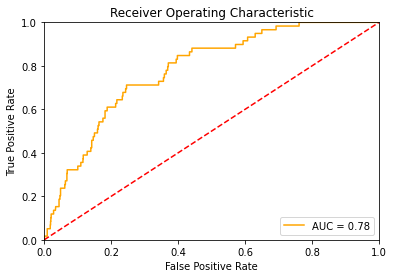

In [101]:
def plot_auc(labels, probs):
    ## Compute the false positive rate, true positive rate
    ## and threshold along with the AUC
    fpr, tpr, threshold = sklm.roc_curve(labels, probs[:,1])
    auc = sklm.auc(fpr, tpr)
    
    ## Plot the result
    plt.title('Receiver Operating Characteristic')
    plt.plot(fpr, tpr, color = 'orange', label = 'AUC = %0.2f' % auc)
    plt.legend(loc = 'lower right')
    plt.plot([0, 1], [0, 1],'r--')
    plt.xlim([0, 1])
    plt.ylim([0, 1])
    plt.ylabel('True Positive Rate')
    plt.xlabel('False Positive Rate')
    plt.show()
    
plot_auc(y_test, probabilities)

In [102]:
#Lets try random forests with balanced arguement
#First we do cross validation to choose optimal hyperparameters

In [103]:
features.shape

(5822, 268)

In [104]:
from sklearn.ensemble import RandomForestClassifier

param_grid = {"max_features": [2, 3, 5, 10, 13], "min_samples_leaf":[3, 5, 10, 20]}
nr.seed(3456)
rf_clf = RandomForestClassifier(class_weight = "balanced")
nr.seed(4455)
rf_clf = ms.GridSearchCV(estimator = rf_clf, param_grid = param_grid, 
                      cv = inside, # Use the inside folds
                      scoring = 'roc_auc',
                      return_train_score = True)
rf_clf.fit(features, labels)
print(rf_clf.best_estimator_.max_features)
print(rf_clf.best_estimator_.min_samples_leaf)

10
20


In [105]:
nr.seed(1115)
rf_mod = RandomForestClassifier(class_weight = "balanced", 
                                max_features = rf_clf.best_estimator_.max_features, 
                                min_samples_leaf = rf_clf.best_estimator_.min_samples_leaf) 
rf_mod.fit(X_train, y_train)
probabilities = rf_mod.predict_proba(X_test)
scores = score_model(probabilities, 0.54)
print_metrics(y_test, scores)

                 Confusion matrix
                 Score Negative    Score Positive
Actual Negative       940               166
Actual Positive        33                26

Accuracy  0.83
 
           Negative      Positive
Num case     1106            59
Precision    0.97          0.14
Recall       0.85          0.44
F1           0.90          0.21


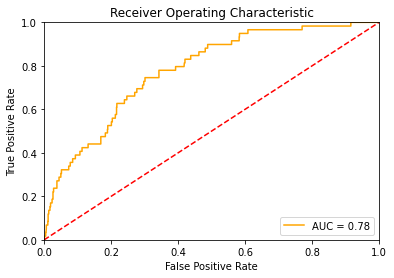

In [106]:
plot_auc(y_test, probabilities)

In [107]:
#SupportVectorMachines

In [108]:
nr.seed(123)
inside = ms.KFold(n_splits=5, shuffle = True)
nr.seed(321)
outside = ms.KFold(n_splits=5, shuffle = True)

In [109]:
nr.seed(3456)
## Define the dictionary for the grid search and the model object to search on
param_grid = {"C": [1, 10, 100, 1000], "gamma":[1.0/50.0, 1.0/200.0, 1.0/500.0, 1.0/1000.0]}
## Define the SVM model
svc_clf = svm.SVC(class_weight = "balanced") 

## Perform the grid search over the parameters
clf = ms.GridSearchCV(estimator = svc_clf, param_grid = param_grid, 
                      cv = inside, # Use the inside folds
                      scoring = 'roc_auc',
                      return_train_score = True)
clf.fit(features, labels)
print(clf.best_estimator_.C)
print(clf.best_estimator_.gamma)

1
0.001


In [110]:

nr.seed(498)
cv_estimate = ms.cross_val_score(clf, features, labels, 
                                 cv = outside) # Use the outside folds

print('Mean performance metric = %4.3f' % np.mean(cv_estimate))
print('SDT of the metric       = %4.3f' % np.std(cv_estimate))
print('Outcomes by cv fold')
for i, x in enumerate(cv_estimate):
    print('Fold %2d    %4.3f' % (i+1, x))

Mean performance metric = 0.761
SDT of the metric       = 0.034
Outcomes by cv fold
Fold  1    0.791
Fold  2    0.803
Fold  3    0.732
Fold  4    0.765
Fold  5    0.715


In [111]:
## Randomly sample cases to create independent training and test data
nr.seed(1115)
indx = range(features.shape[0])
indx = ms.train_test_split(indx, test_size = 0.20)
X_train = features[indx[0],:]
y_train = np.ravel(labels[indx[0]])
X_test = features[indx[1],:]
y_test = np.ravel(labels[indx[1]])

In [112]:
nr.seed(1115)
svm_mod = svm.SVC(C = clf.best_estimator_.C,
                  gamma = clf.best_estimator_.gamma,
                  class_weight = "balanced",
                  probability=True) #sample weights {0:0.33, 1:0.67} 
svm_mod.fit(X_train, y_train)

SVC(C=1, class_weight='balanced', gamma=0.001, probability=True)

In [113]:

def score_model(probs, threshold):
    return np.array([1 if x > threshold else 0 for x in probs[:,1]])

def print_metrics(labels, probs, threshold):
    scores = score_model(probs, threshold)
    metrics = sklm.precision_recall_fscore_support(labels, scores)
    conf = sklm.confusion_matrix(labels, scores)
    print('                 Confusion matrix')
    print('                 Score negative    Score positive')
    print('Actual negative    %6d' % conf[0,0] + '             %5d' % conf[0,1])
    print('Actual positive    %6d' % conf[1,0] + '             %5d' % conf[1,1])
    print('')
    print('Accuracy        %0.2f' % sklm.accuracy_score(labels, scores))
    print('AUC             %0.2f' % sklm.roc_auc_score(labels, probs[:,1]))
    print('Macro precision %0.2f' % float((float(metrics[0][0]) + float(metrics[0][1]))/2.0))
    print('Macro recall    %0.2f' % float((float(metrics[1][0]) + float(metrics[1][1]))/2.0))
    print(' ')
    print('           Negative      Positive')
    print('Num case   %6d' % metrics[3][0] + '        %6d' % metrics[3][1])
    print('Precision  %6.2f' % metrics[0][0] + '        %6.2f' % metrics[0][1])
    print('Recall     %6.2f' % metrics[1][0] + '        %6.2f' % metrics[1][1])
    print('F1         %6.2f' % metrics[2][0] + '        %6.2f' % metrics[2][1])
    
probabilities = svm_mod.predict_proba(X_test)


print_metrics(y_test, probabilities, 0.5)

                 Confusion matrix
                 Score negative    Score positive
Actual negative      1092                 0
Actual positive        73                 0

Accuracy        0.94
AUC             0.77
Macro precision 0.47
Macro recall    0.50
 
           Negative      Positive
Num case     1092            73
Precision    0.94          0.00
Recall       1.00          0.00
F1           0.97          0.00


C:\Users\Sergio\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


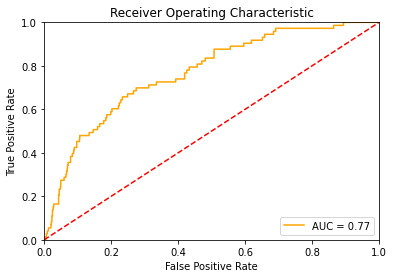

In [114]:
plot_auc(y_test, probabilities)

In [115]:
#Paragraph: (chose better model)
#I used classification models instead of numerical variable regression models since the CARAVAN variable only has the outcomes 
#0 or 1.

#The data is from a Data Mining company in the Netherlands and all variables are in the form of categorical or discrete values
#with no missing values

#One hot encoding was used to transform the variables for use in the models
#Regularization parameter C was optimized

#Support Vector Machines was chosen as the best model as it had AUC similar to the other models (0.77 vs 0.78), while having
#higher accuracy of 0.94 (0.74 Linear, 0.83 Random Forest).

#Average temperature of zipcode, rainfall, height above sea level


In [116]:
#-------------------------------------------------------------------------------------------------------------------------------
# import data for predicting

#final = pd.read_csv('PredictingData.csv')
#print(final.shape)

In [117]:
#final_features = final[features_chosen]
#final_features.head()

In [118]:
#encoded_final_features = encode_cat_features(final_features)
#final_features = np.concatenate([encoded_final_features], 1)
#print(final_features.shape)
#final_features[0,:]

In [119]:
#sum = 0
#for i in features_chosen:
 #   column = final[i].unique()
  #  sum = sum + len(column)
#print(sum)    

In [120]:
#sum = 0
#for i in features_chosen:
 #   column = customer_info[i].unique()
  #  sum = sum + len(column)
#print(sum)    

In [121]:
#chosen model:
#probabilities = rf_mod.predict_proba(final_features)
#final_classifion_scores = score_model(probabilities, 0.54)
#https://stackoverflow.com/questions/44026832/valueerror-number-of-features-of-the-model-must-match-the-input

In [122]:
#print(final_classifion_scores)

In [123]:
#len(final_classifion_scores)